# Differential dynamic microscopy

In [1]:
#The two modules you will be working with are ddm_analysis and ddm_fit
import ddm_analysis as da
import ddm_fit as df
#Other modules of the DDM package which you need to have on your computer
import test_ddm as ddm
import mpfit_parameters_dictionaries as mpd
import helper_functions_cbf as hp
#Generally usefull modules
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload

Before you start:
You need to install Xarray find more info: http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
The package also requires the Nd2reader module https://rbnvrw.github.io/nd2reader/index.html
Lastly, you need the yaml module for example: https://anaconda.org/anaconda/yaml or use pip install


YAML file, with all the meta data,  analysis and fitting parameters for DDM analysis

![Yaml](yamlfilelayout.PNG)

# Calculate DDM Matrix

In [2]:
#Give the YAML file to the DDM_analysis function of the ddm_analysis module
Round1=da.DDM_analysis("Test_file.yml")

File path to image data exists
Provided metadata: {'pixel_size': 0.242, 'frame_rate': 41.7}
Image shape: 3000-by-128-by-128
Number of frames to use for analysis: 99
Maximum lag time (in frames): 80
Number of lag times to compute DDM matrix: 10
Using the full frame, dimensions: 128-by-128.
Applying windowing function...


In [3]:
Round1.calculate_DDM_matrix()

The file C:/Users/Hanna/Documents/DDM_miniproject/images_nobin_40x_128x128_8bit_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): n


In [6]:
fit_class = df.DDM_fit("Test_file.yml")

TypeError: format() got an unexpected keyword argument 'thousands'

## Example of Beads in  Vimentin Network

In [12]:
yaml_file='C:/Users/Hanna/Documents/DDM_miniproject/Vimentin_analysis/Vimentin.yml'
Round2=da.DDM_analysis(yaml_file)

File path to image data exists
Provided metadata: {'pixel_size': 0.13, 'frame_rate': 99.9}
Image shape: 5000-by-512-by-512
Number of frames to use for analysis: 2999
Maximum lag time (in frames): 2000
Number of lag times to compute DDM matrix: 100
Using the full frame, dimensions: 512-by-512
Apply windowing function


Calculating the DDM matrix for 210624_Vimentin_m04_p06_A_...
Running dt=1...

Running dt=5...

Running dt=9...

Running dt=13...

Running dt=17...

Running dt=21...

Running dt=27...

Running dt=34...

Running dt=43...

Running dt=54...

Running dt=68...

Running dt=86...

Running dt=108...

Running dt=136...

Running dt=171...

Running dt=215...

Running dt=270...

Running dt=340...

Running dt=427...

Running dt=537...

Running dt=675...

Running dt=848...

Running dt=1066...

Running dt=1340...

Running dt=1684...

DDM matrix took 20193.939801692963 seconds to compute.
 Background estimate ± std is 11960.01 ± 64.39
Could not save data set as: C:/Users/Hanna/Documents/DDM_miniproject/Vimentin_analysis/210624_Vimentin_m04_p06_A__ddmmatrix.nc
Provide an alternative name: 210624_Vimentin_m04_p06_A__ddmmatrix2
note this name should be entered in the yaml file for fitting


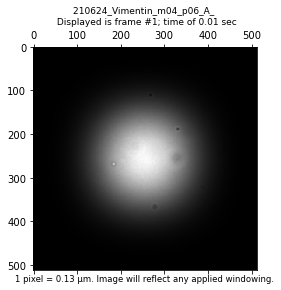

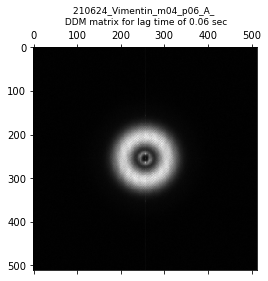

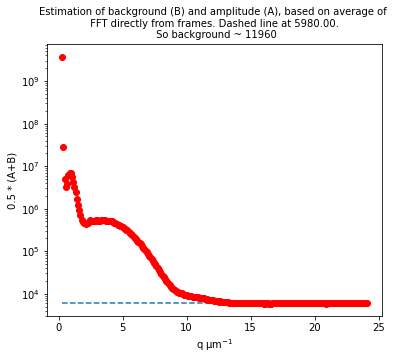

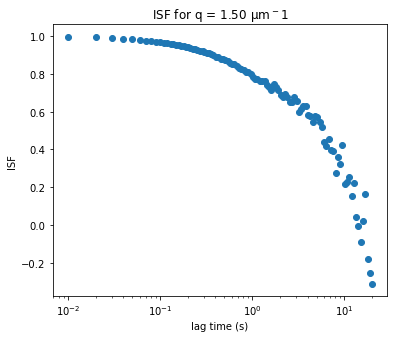

In [13]:
Round2.calculate_DDM_matrix()

In [14]:
Round2.ddm_dataset

<xarray.Dataset>
Dimensions:           (frames: 100, lagtime: 100, q: 256, q_x: 512, q_y: 512, x: 512, y: 512)
Coordinates:
  * lagtime           (lagtime) float64 0.01001 0.02002 0.03003 ... 18.9 20.02
    framelag          (frames) int32 1 2 3 4 5 6 ... 1591 1684 1783 1888 2000
  * q_y               (q_y) float64 -24.17 -24.07 -23.98 ... 23.88 23.98 24.07
  * q_x               (q_x) float64 -24.17 -24.07 -23.98 ... 23.88 23.98 24.07
  * q                 (q) float64 0.0 0.0944 0.1888 0.2832 ... 23.88 23.98 24.07
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 505 506 507 508 509 510 511
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 505 506 507 508 509 510 511
Dimensions without coordinates: frames
Data variables:
    ddm_matrix        (lagtime, q_y, q_x) float64 1.045e+04 ... 1.215e+04
    ravs              (lagtime, q) float64 5.386e+04 3.51e+04 ... 1.101e+04
    first_image       (y, x) float64 0.0001421 0.0001494 ... 0.0001469 0.0001404
    av_fft_offrame    (q) float64 6.891e+12 2.352e+12 ... 5.949e+03 5.959e+03
    B                 float64 1.196e+04
    B_std             float64 64.39
    num_pairs_per_dt  (lagtime) int32 2998 2997 2996 1498 1497 ... 3 3 3 2 2
    Amplitude         (q) float64 1.378e+13 4.705e+12 ... -61.03 -42.45
    ISF               (lagtime, q) float64 1.0 1.0 1.0 ... -4.691 -20.15 -21.34
Attributes:
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/Hanna/Documents/DDM_miniproject/Vimenti...
    FileName:                210624_Vimentin_m04_p06_A_.tif
    pixel_size:              0.13
    frame_rate:              99.9
    starting_frame_number:   yes
    ending_frame_number:     3000
    number_lagtimes:         100
    first_lag_time:          yes
    last_lag_time:           2000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  yes
    binning:                 no
    bin_size:                2

# Fitting 

In [7]:
yaml_file='C:/Users/Hanna/Documents/DDM_miniproject/Vimentin_analysis/Vimentin.yml'
vimentin = df.DDM_fit(yaml_file)

1 - Parameter name: Tau
2 - Parameter name: StretchingExp
Parameter 'Tau' set to 1.0.
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 100.
Parameter 'StretchingExp' set to 1.0.
Parameter 'StretchingExp' lower limit set to 0.5.
Parameter 'StretchingExp' upper limit set to 1.2.
Loading file C:/Users/Hanna/Documents/DDM_miniproject/Vimentin_analysis/210624_Vimentin_m04_p06_A__ddmmatrix2_ddmmatrix.nc ...


In [8]:
fit_01=vimentin.fit()

In function ddm_fit.get_tau_vs_q_fit, using new tau...
Under what name would you want to save the generated fit: 01
Fit is saved in fittings dictionary


In [19]:
vimentin.save_fit_results_to_excel(fit_01)

In function ddm_fit.get_tau_vs_q_fit, using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


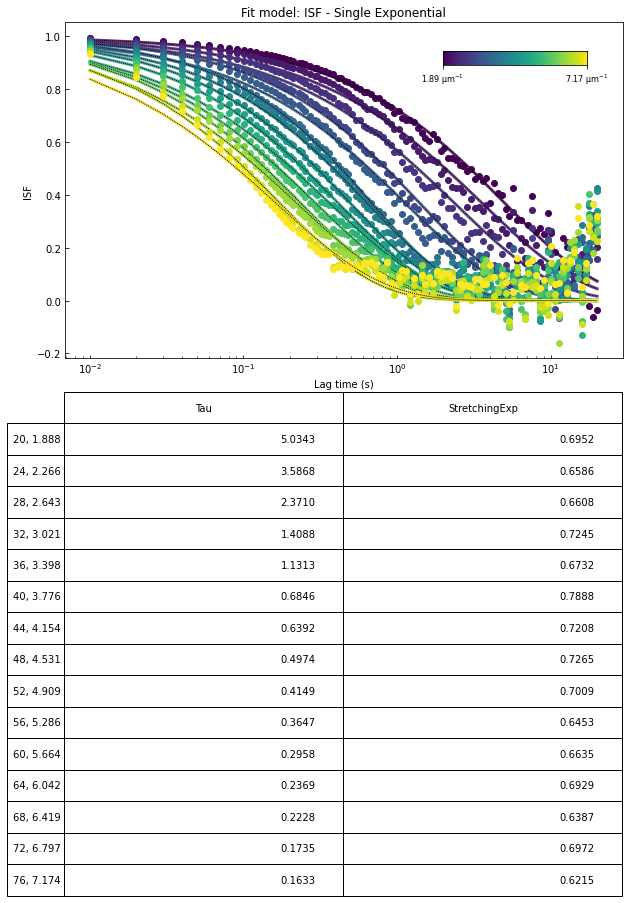

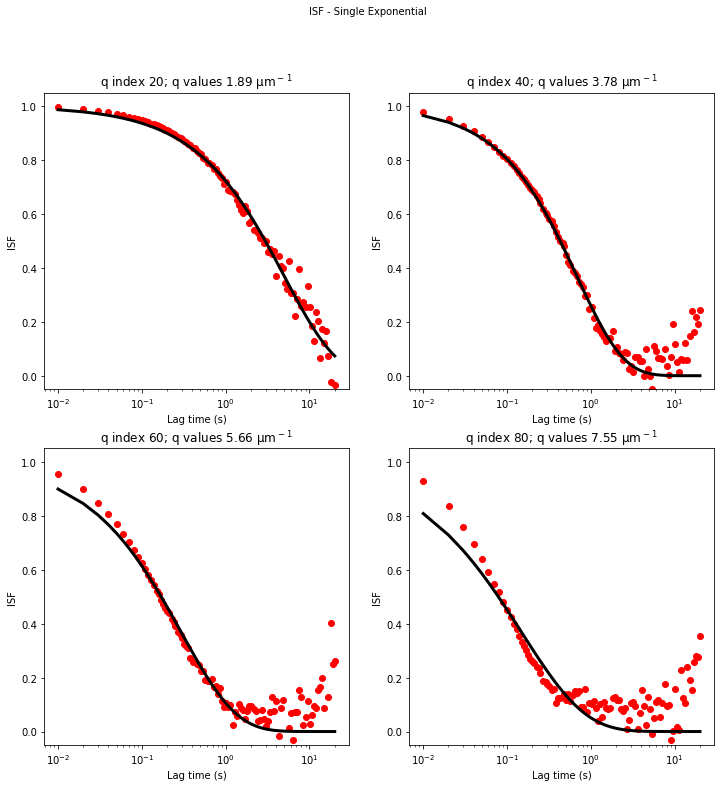

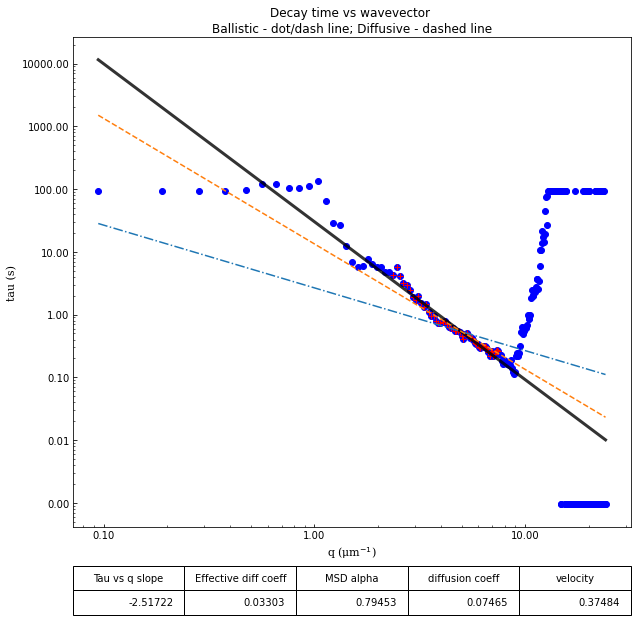

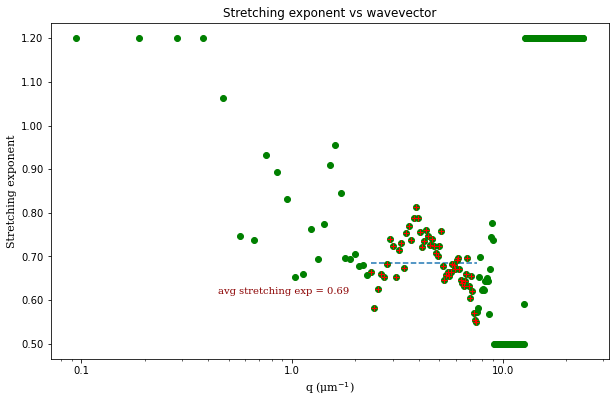

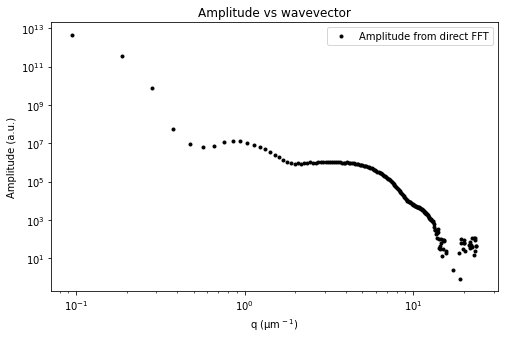

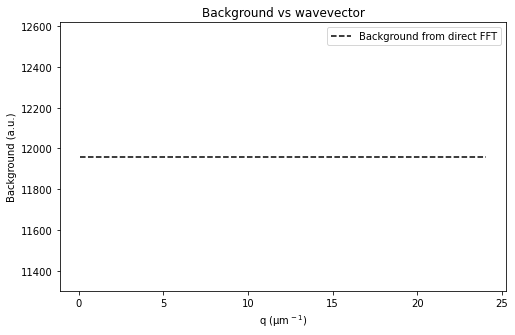

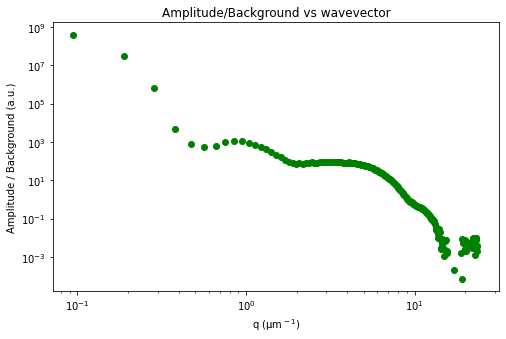

In [21]:
vimentin.fit_report(fit_01, PDF_save=True,forced_qs=[20,85], q_indices=[20,40,60,80])

In [12]:
#### Fix a parameter 
vimentin.set_parameter_initial_guess('StretchingExp', 0.7)
vimentin.set_parameter_fixed('StretchingExp', True)
fit_02=vimentin.fit()

Parameter 'StretchingExp' set to 0.7.
Parameter 'StretchingExp' will be fixed.
In function ddm_fit.get_tau_vs_q_fit, using new tau...
Under what name would you want to save the generated fit: 02
Fit is saved in fittings dictionary


In function ddm_fit.get_tau_vs_q_fit, using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


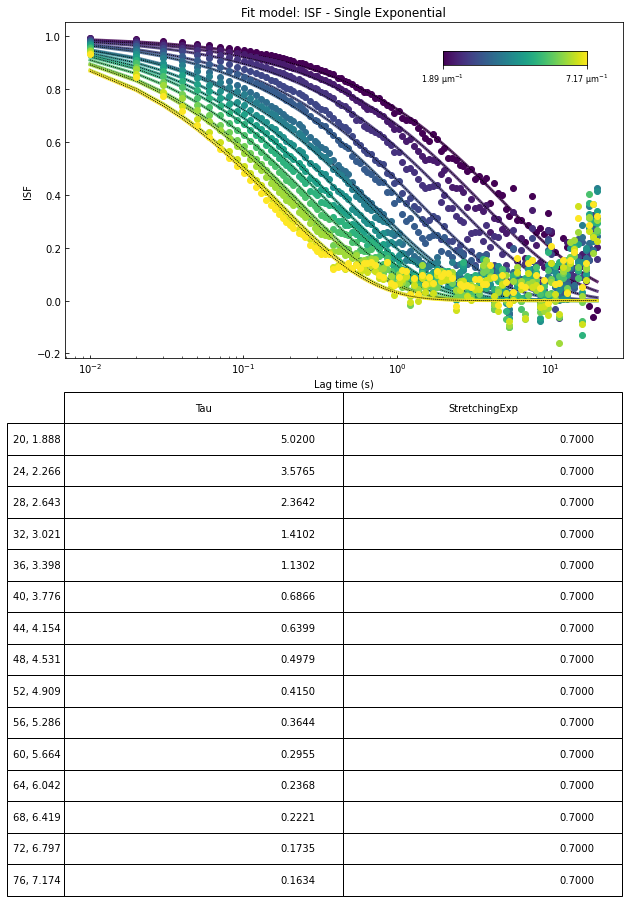

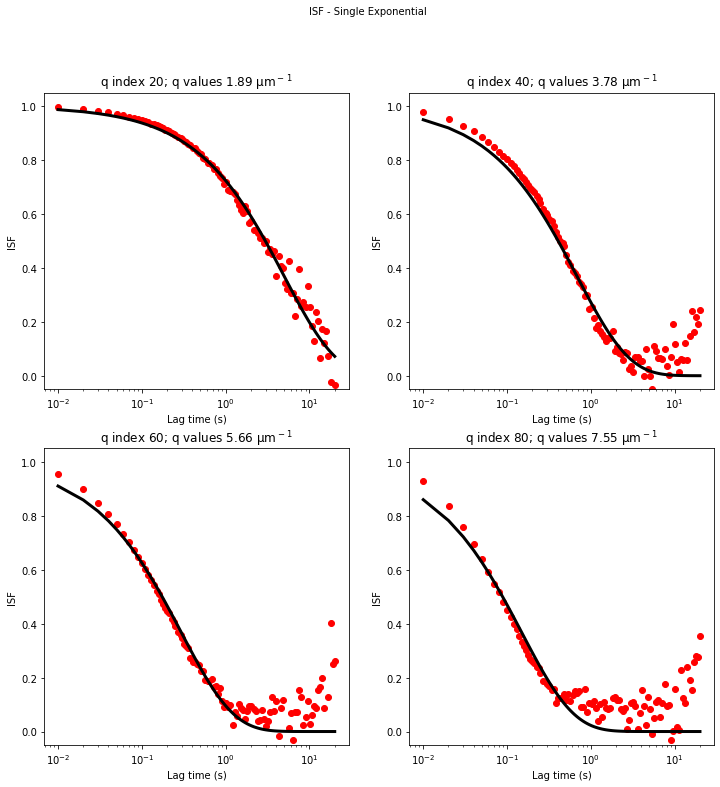

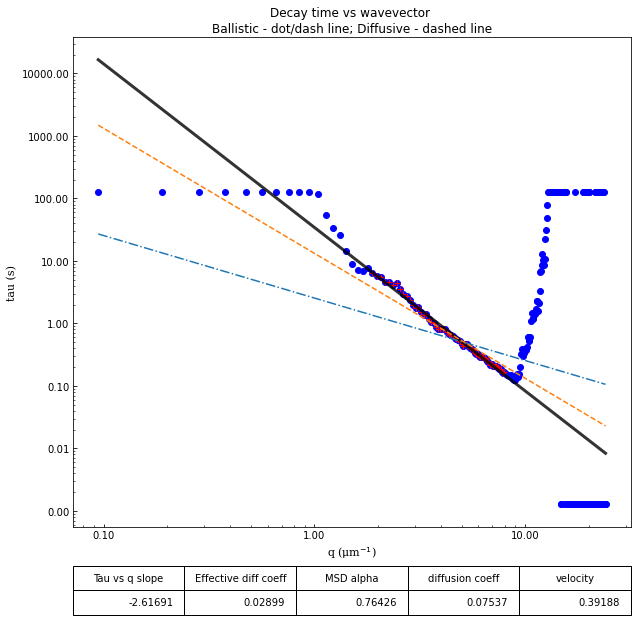

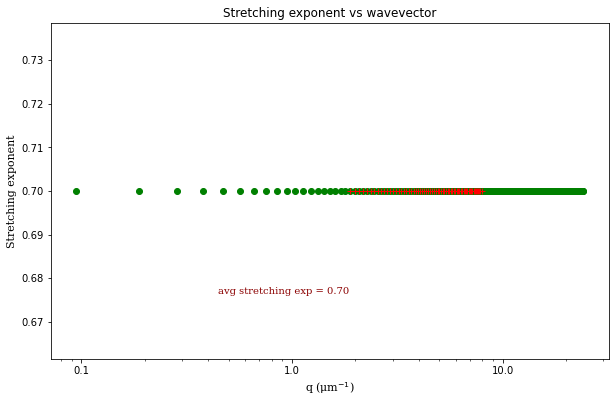

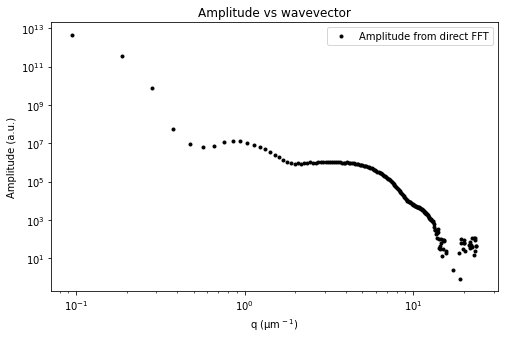

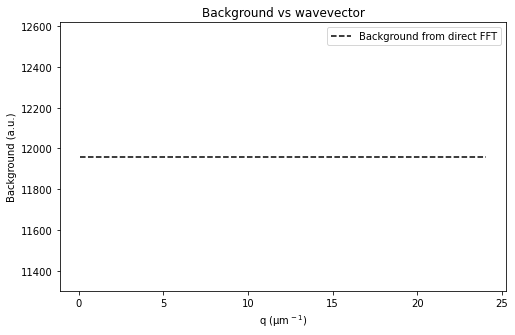

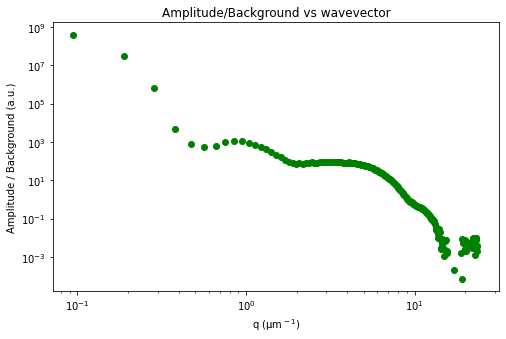

In [13]:
vimentin.fit_report(fit_02, PDF_save=False,forced_qs=[20,85], q_indices=[20,40,60,80])

In [7]:
mpd.return_possible_fitting_models()

1 - DDM Matrix - Single Exponential
2 - DDM Matrix - Double Exponential
3 - DDM Matrix - Exponential and Ballistic
4 - DDM Matrix - Ballistic
5 - DDM Matrix - Double Ballistic
6 - DDM Matrix - Single Exponential - NonErgodic
7 - ISF - Single Exponential
8 - ISF - Double Exponential
9 - ISF - Exponential and Ballistic
10 - ISF - Ballistic
11 - ISF - Double Ballistic
12 - ISF - Single Exponential - NonErgodic


In [14]:
vimentin.reload_fit_model_by_name('DDM Matrix - Single Exponential')

In [15]:
vimentin.use_parameters_provided()

1 - Parameter name: Amplitude
2 - Parameter name: Tau
3 - Parameter name: Background
4 - Parameter name: StretchingExp
Parameter 'Amplitude' set to 1e3.
Parameter 'Amplitude' lower limit set to 1.
Parameter 'Amplitude' upper limit set to 1e6.
Parameter 'Tau' set to 1.0.
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 100.
Parameter 'Background' set to 10.
Parameter 'Background' lower limit set to 0.
Parameter 'Background' upper limit set to 1e3.
Parameter 'StretchingExp' set to 1.0.
Parameter 'StretchingExp' lower limit set to 0.5.
Parameter 'StretchingExp' upper limit set to 1.2.


In [16]:
fit_03=vimentin.fit()

In function ddm_fit.get_tau_vs_q_fit, using new tau...
Under what name would you want to save the generated fit: 03
Fit is saved in fittings dictionary


In function ddm_fit.get_tau_vs_q_fit, using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


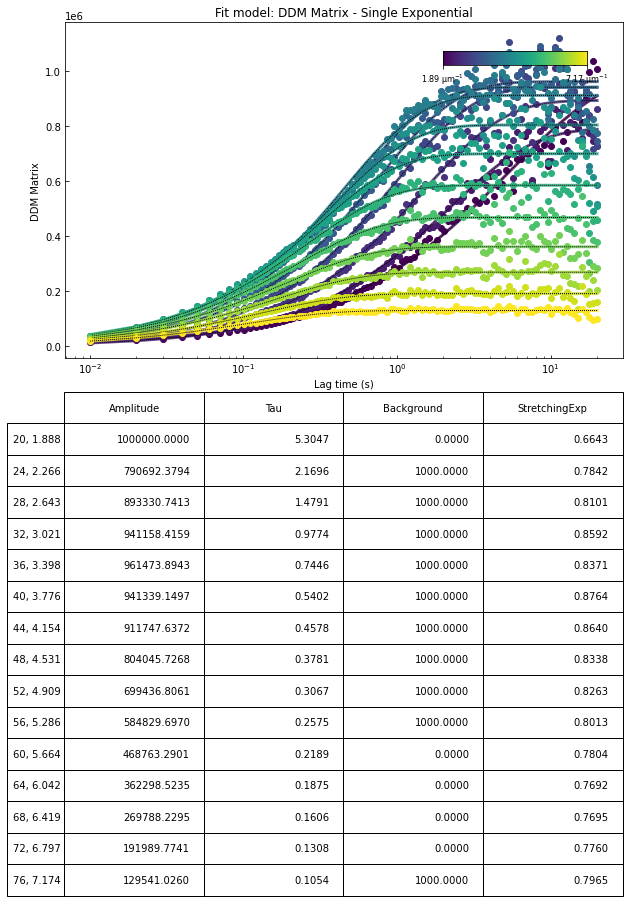

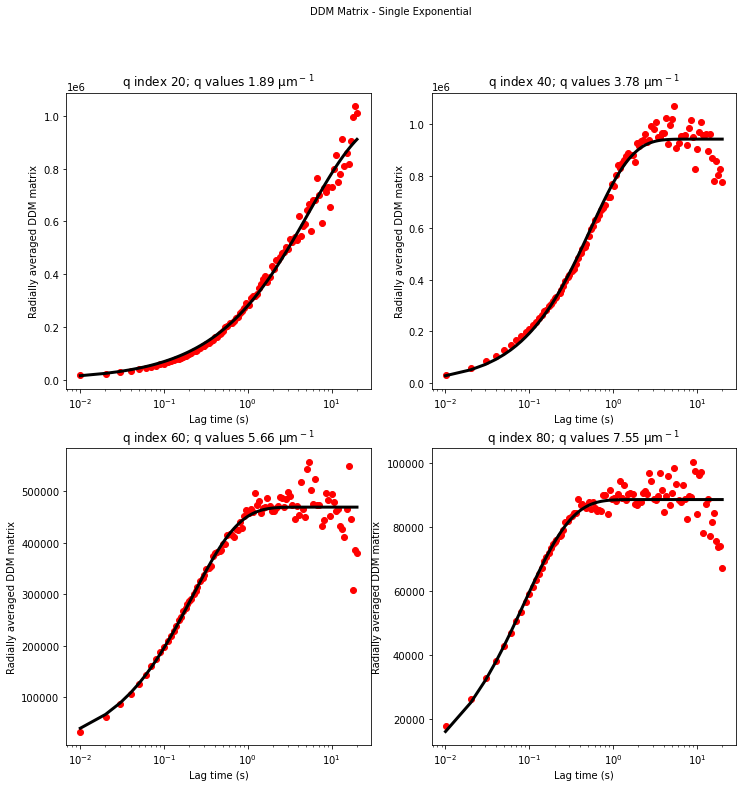

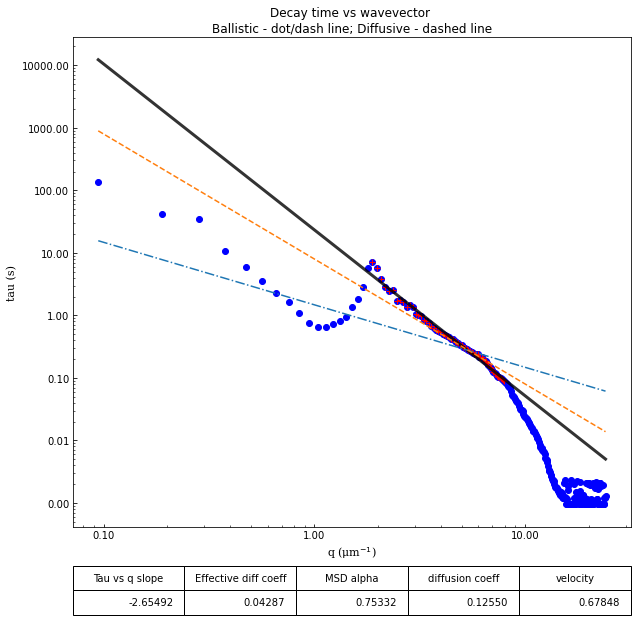

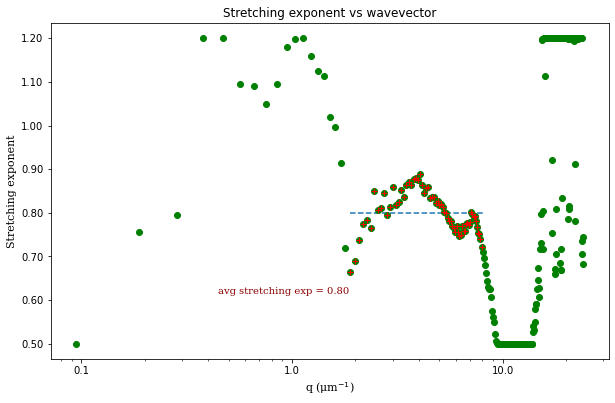

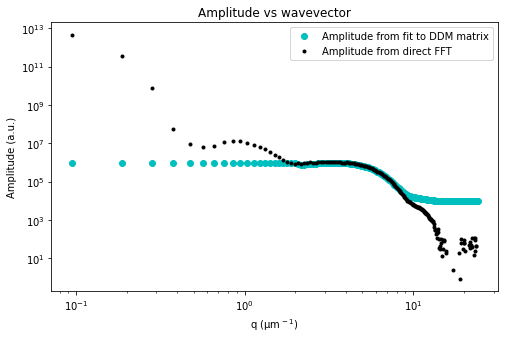

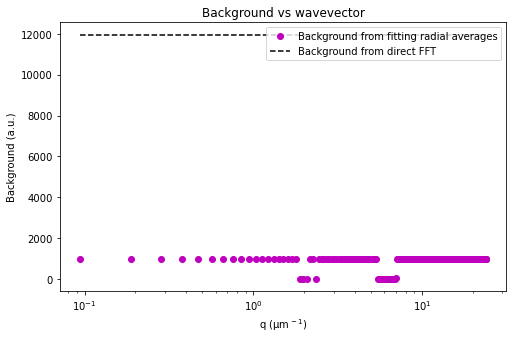

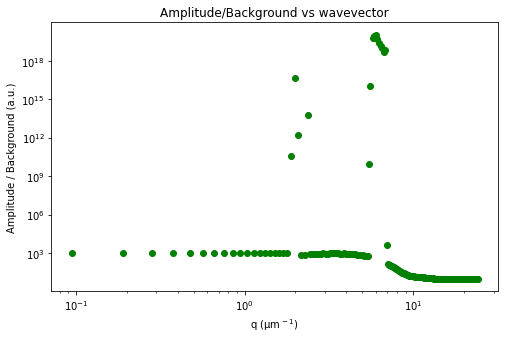

In [18]:
vimentin.fit_report(fit_03, PDF_save=False,forced_qs=[20,85], q_indices=[20,40,60,80])

In [26]:
# Find back your previous fits in the fitting library
vimentin.fittings['01']['fit']

<xarray.Dataset>
Dimensions:     (lagtime: 100, parameter: 2, q: 256)
Coordinates:
  * parameter   (parameter) <U13 'Tau' 'StretchingExp'
  * q           (q) float64 0.0 0.0944 0.1888 0.2832 ... 23.79 23.88 23.98 24.07
  * lagtime     (lagtime) float64 0.01001 0.02002 0.03003 ... 17.85 18.9 20.02
Data variables:
    parameters  (parameter, q) float64 100.0 100.0 100.0 100.0 ... 1.2 1.2 1.2
    theory      (lagtime, q) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    model:                          ISF - Single Exponential
    data_to_use:                    ISF
    initial_params_dict:            [{'n': 0, 'value': 1.0, 'limits': [0.001,...
    effective_diffusion_coeff:      0.033029471275301675
    tau_vs_q_slope:                 [-2.51722452]
    msd_alpha:                      [0.79452587]
    msd_effective_diffusion_coeff:  [0.06656241]
    diffusion_coeff:                0.07465100059881079
    diffusion_coeff_std:            0.015574964811929035
    velocity:                       0.37484478372427066
    velocity_std:                   0.15594813156316822
    good_q_range:                   [25, 80]